# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [2]:
#Your code here
import pandas as pd
import numpy as np

df = pd.read_csv("multipleChoiceResponses_cleaned.csv")
df.head()

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, co

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.FormalEducation.value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [30]:
# Your code here
#Ho = The salary of people with Master's degrees is the same as those with Bachelor's degrees.
#Ha = The salary of people with Master's degrees is higher than those with Bachelor's degrees.

import seaborn as sns

#sample 1
masters_wages = df[(df.FormalEducation=="Master's degree") & (df.AdjustedCompensation.notnull())]["AdjustedCompensation"]
#sample 2
bachelors_wages = df[(df.FormalEducation=="Bachelor's degree") & (df.AdjustedCompensation.notnull())]["AdjustedCompensation"]

m1 = masters_wages.mean()
m2 = bachelors_wages.mean()
var1 = masters_wages.var(ddof=1)
var2 = bachelors_wages.var(ddof=1)
n1, n2 = masters_wages.size, bachelors_wages.size

In [29]:
print('Comparison of Adjusted Compensation for Masters vs Bachelors')
print("Median Values: \ts1: {} \ts2: {}".format(round(masters_wages.median(),2), round(bachelors_wages.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(m1),2), round(m2,2))
print('Sample sizes: \ts1: {} \ts2: {}'.format(n1, n2))
print("Welch's t-test p-value:", p_value_welch_ttest(masters_wages, bachelors_wages))

Comparison of Adjusted Compensation for Masters vs Bachelors
Median Values: 	s1: 53812.17 	s2: 38399.4
Mean Values: 	s1: 69140.0 	s2: 2 64887.1
Sample sizes: 	s1: 1990 	s2: 1107
t-stat: 0.43786693335411514 degrees of freedom 1350.0828973008781
Welch's t-test p-value: 0.33077639451272445


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


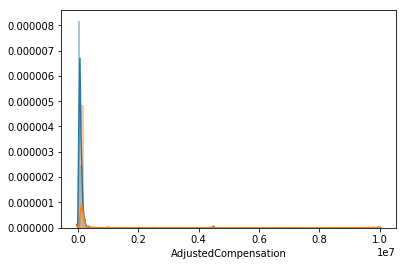

In [31]:
sns.distplot(masters_wages)
sns.distplot(bachelors_wages)

In [33]:
# Ouliers in both
masters_wages.describe(), bachelors_wages.describe()

(count    1.990000e+03
 mean     6.913990e+04
 std      1.355272e+05
 min      0.000000e+00
 25%      2.186800e+04
 50%      5.381217e+04
 75%      9.200000e+04
 max      4.498900e+06
 Name: AdjustedCompensation, dtype: float64, count    1.107000e+03
 mean     6.488710e+04
 std      3.069359e+05
 min      0.000000e+00
 25%      1.126620e+04
 50%      3.839940e+04
 75%      8.023100e+04
 max      9.999999e+06
 Name: AdjustedCompensation, dtype: float64)

In [61]:
threshold = 500000
sample1 = masters_wages[masters_wages <= threshold]
sample2 = bachelors_wages[bachelors_wages <= threshold]
sample1.size, sample2.size

(1985, 1103)

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


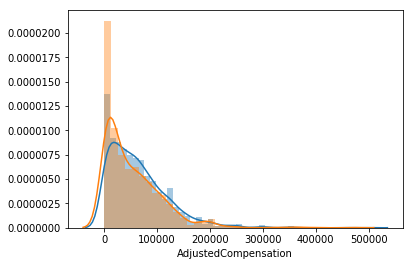

In [62]:
sns.distplot(sample1)
sns.distplot(sample2)

In [63]:
print("Median Values: \ts1: {} \ts2: {}".format(round(sample1.median(),2), round(sample2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(sample1.mean(),2), round(sample2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(sample1), len(sample2)))
print("Welch's t-test p-value with outliers removed:", p_value_welch_ttest(sample1, sample2))

Median Values: 	s1: 53539.72 	s2: 38292.15
Mean Values: 	s1: 63976.63 	s2: 53744.35
Sample sizes: 	s1: 1985 	s2: 1103
t-stat: 4.926460514781741 degrees of freedom 2278.449920994196
Welch's t-test p-value with outliers removed: 4.4874583271514723e-07


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [67]:
#sample 1
sample1 = df[(df.FormalEducation=="Doctoral degree") & (df.AdjustedCompensation.notnull())]["AdjustedCompensation"]
#sample 2
sample2 = df[(df.FormalEducation=="Bachelor's degree") & (df.AdjustedCompensation.notnull())]["AdjustedCompensation"]

print('Comparison of Adjusted Compensation for Doctorates vs Bachelors')
print("Median Values: \ts1: {} \ts2: {}".format(round(sample1.median(),2), round(sample2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(sample1.mean(),2), round(sample2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(sample1), len(sample2)))
print("Welch's t-test p-value:", p_value_welch_ttest(sample1, sample2))


Comparison of Adjusted Compensation for Doctorates vs Bachelors
Median Values: 	s1: 74131.92 	s2: 38399.4
Mean Values: 	s1: 29566175.76 	s2: 64887.1
Sample sizes: 	s1: 967 	s2: 1107
t-stat: 1.0081234695549772 degrees of freedom 966.0001919995985
Welch's t-test p-value: 0.15682381994720251


In [68]:
threshold = 500000
sample1 = sample1[sample1 <= threshold]
sample2 = sample2[sample2 <= threshold]
sample1.size, sample2.size

(964, 1103)

In [69]:
print('Comparison of Adjusted Compensation for Doctorates vs Bachelors')
print("Median Values: \ts1: {} \ts2: {}".format(round(sample1.median(),2), round(sample2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(sample1.mean(),2), round(sample2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(sample1), len(sample2)))
print("Welch's t-test p-value with outliers removed:", p_value_welch_ttest(sample1, sample2))

Comparison of Adjusted Compensation for Doctorates vs Bachelors
Median Values: 	s1: 73152.77 	s2: 38292.15
Mean Values: 	s1: 86194.98 	s2: 53744.35
Sample sizes: 	s1: 964 	s2: 1103
t-stat: 12.098472655425814 degrees of freedom 1896.9589331289894
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [70]:
#Your code here
#Perform ANOVA here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [71]:
#Remove outliers
threshold = 500000
filtered_df = df[df.AdjustedCompensation <= threshold]

In [72]:
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, filtered_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!

In [21]:
#INCLUDING FUNCTIONS FOR WELCHS TTEST BELOW

import numpy as np
import scipy.stats as stats

def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. This function returns the degrees of freedom """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


def p_value_welch_ttest(a, b, two_sided=False):
    """Calculates the p-value for Welch's t-test given two samples.
    By default, the returned p-value is for a one-sided t-test. 
    Set the two-sided parameter to True if you wish to perform a two-sided t-test instead.
    """
    t = welch_t(a, b)
    df = welch_df(a, b)
    
    print("t-stat:",t,"degrees of freedom",df)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p